[37, 105, 112, 169, 177, 257, 266, 314, 325, 339, 348, 427, 437, 482, 490, 518, 528, 571, 579, 619, 636, 656, 689, 766]


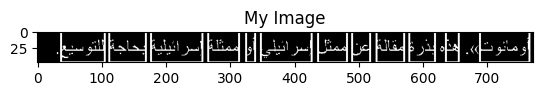

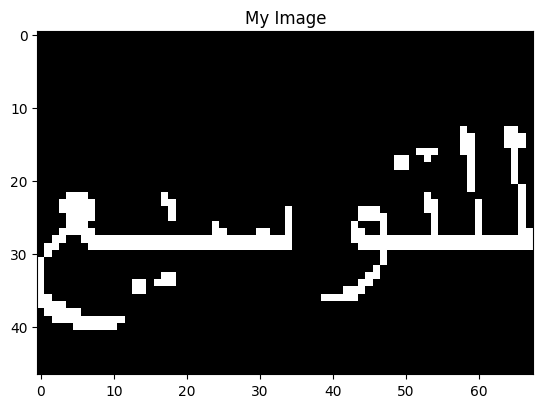

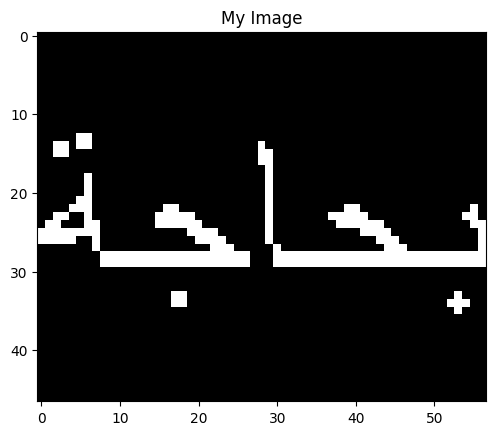

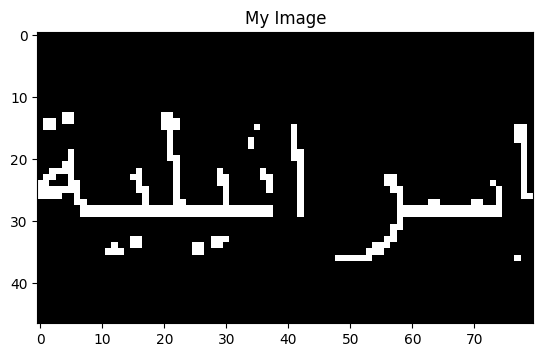

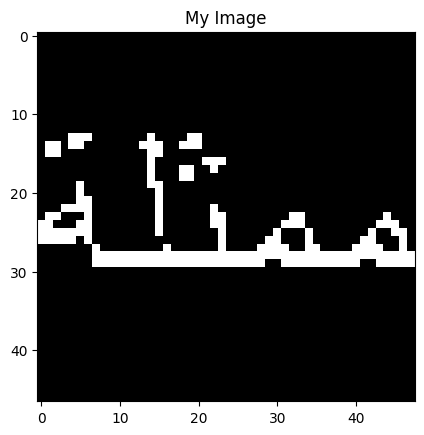

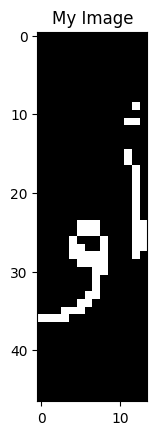

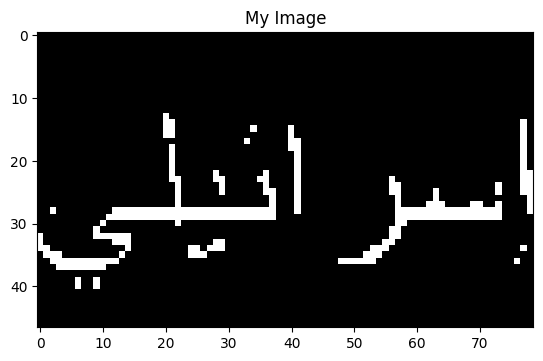

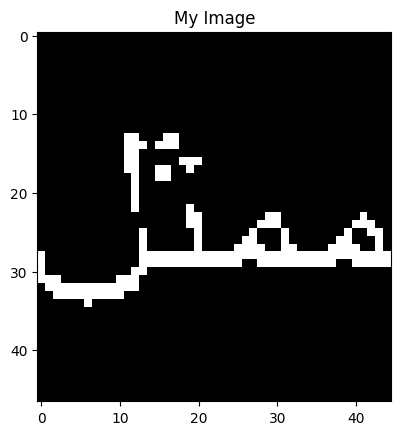

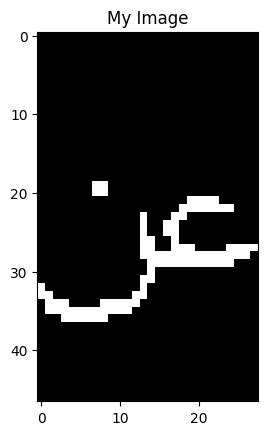

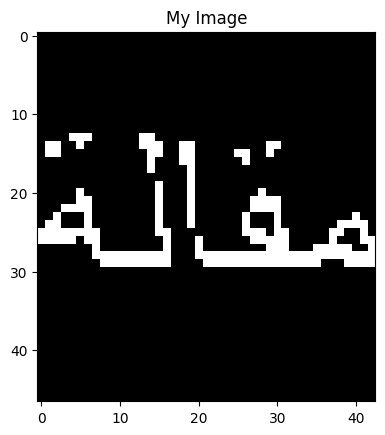

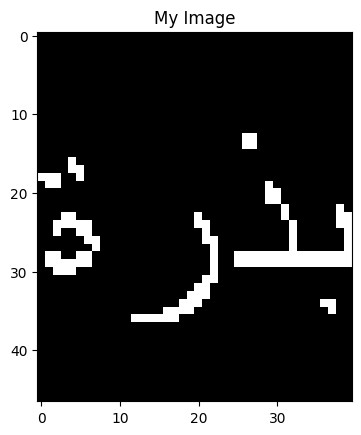

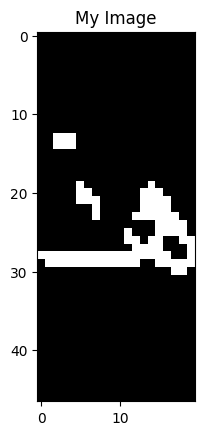

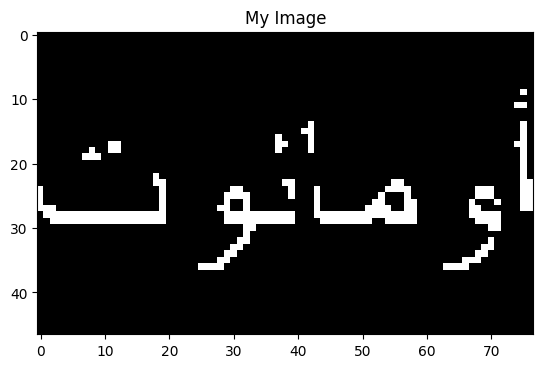

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def vertical_projection(line_image):
    vertical_sum = np.sum(line_image, axis=0)
    return vertical_sum
def find_gap_space_location(line):
    G = [0]  # List of gaps"
    L = []  # List of gap lengths"
    VP = vertical_projection(line)
    flag = 0
    i = 1
    size = 0

    while i < len(VP):
        if VP[i] != 0 and flag == 0:
            size += 1
            G.append(i)
            L.append(G[size] - G[size - 1])

            flag = 1
        elif VP[i] == 0 and flag == 1:
            G.append(i)
            size += 1
            flag = 0
        i += 1

    return G, L

def gap_length_filtration(G, L):
    iqr_value = np.percentile(L, [25, 75])[1] - np.percentile(L, [25, 75])[0]

    i = 0
    while i < len(G) - 1:
        if G[i + 1] - G[i] <= iqr_value:
            G.remove(G[i])
            G.remove(G[i])
        else:
            i = i + 1

    return G, L

def word_segmentation(line_image):
    G, L = find_gap_space_location(line_image)

    G, L = gap_length_filtration(G, L)

    Words = []
    marked_image = line_image.copy()  # Create a copy of the image for mark
    
    G.remove(G[0])
    print(G)

    i = 0
    while i < len(G) - 1:

        word_start_index = G[i]
        word_end_index = G[i+1]
        
        word = line_image[:, word_start_index:word_end_index]
        Words.append(word)
        
        cv2.rectangle(marked_image, (word_start_index, 0), (word_end_index, line_image.shape[0]), (255, 255, 255), 2)
        i += 2

    return Words, marked_image


def convert_to_binary(image_path, threshold_value=127):
    # Load the image",
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale",
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to create a binary image\n",
    _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
    
    return binary_image

# Example usage"
input_image_path = 'line.png'


line_image = convert_to_binary(input_image_path)

count_ones = np.count_nonzero(line_image == 255)
count_zeros = np.count_nonzero(line_image == 0)

if count_ones > count_zeros:
    line_image = 255 - line_image

# Perform word segmentation and get marked image"
words_list, marked_image = word_segmentation(line_image)



# Display the image",
plt.imshow(marked_image, cmap='grey',)
plt.title("My Image")
plt.show()

for i in words_list:
    plt.imshow(i, cmap='grey',)
    plt.title("My Image")
    plt.show()